In [1]:
import qc_utils as utils
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import sympy
import itertools
import numpy as np

In [33]:
# Define the number of portfolios to optimize
N_portfolio = 4

# Parameters of the cross-entropy optimizer for the beta, gamma angles 
N_trials_ce = 100
N_ce_iterations = 10
N_ce_samples = 50
f_elite = 0.1

# Portfolio parameters 
portfolio_parameters = {}

# Daily returns 
portfolio_parameters['mu'] = np.array([4.01e-04,  6.10e-05,  9.16e-04, -6.19e-04])

# The covariance matrix
portfolio_parameters['sigma'] = np.array([[9.980e-05, 4.250e-05, 3.720e-05, 4.030e-05],
                                          [4.250e-05, 1.005e-04, 4.110e-05, 1.520e-05],
                                          [3.720e-05, 4.110e-05, 1.813e-04, 1.790e-05],
                                          [4.030e-05, 1.520e-05, 1.790e-05, 2.531e-04]])

portfolio_parameters['T'] = 0.0
portfolio_parameters['A'] = 0.03
portfolio_parameters['y'] = np.array([0.0,0.0,0.0,0.0])
portfolio_parameters['lam'] = 0.9
portfolio_parameters['D'] = 2


# Determine the optimal solution via brute-force search

In [34]:
# Instantiate the portfolio 
portfolio = utils.Portfolio(N_portfolio=N_portfolio)

# Get the benchmark parameters
benchmark_parameters = portfolio.benchmark_values()
print(benchmark_parameters)

# Determine the results via a bruteforce search
best_bruteforce_result = portfolio1.brute_force_search(portfolio_parameters)

# Provide the optimal energy along with the state
print('='*100)
print('Brute-Force state: ', best_bruteforce_result['minimum_cost_states'])
print('Brute-Force energy: ', best_bruteforce_result['minimum_cost'])
print('='*100)

{'mu': array([ 4.01e-04,  6.10e-05,  9.16e-04, -6.19e-04]), 'sigma': array([[9.980e-05, 4.250e-05, 3.720e-05, 4.030e-05],
       [4.250e-05, 1.005e-04, 4.110e-05, 1.520e-05],
       [3.720e-05, 4.110e-05, 1.813e-04, 1.790e-05],
       [4.030e-05, 1.520e-05, 1.790e-05, 2.531e-04]]), 'D': 2.0, 'lam': 0.9, 'T': 0, 'A': 0.03, 'y': array([0., 0., 0., 0., 0., 0., 0., 0.])}
Brute-Force state:  [[1 0 1 0]]
Brute-Force energy:  0.00018825000000000008


# Construct the QAOA-soft circuit

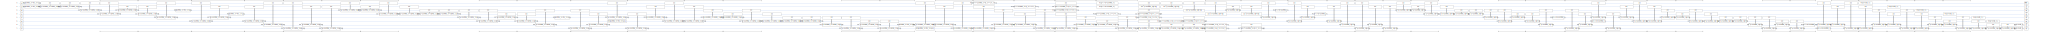

In [35]:
# Generate a QAOA circuit with p=1 depth
QAOA_soft_circuit = portfolio.QAOA_circuit(p=1)

# plot the circuit
SVGCircuit(QAOA_soft_circuit)

In [36]:
# The results
#QAOA_soft_circuit_p1 = portfolio.QAOA_circuit(p=1)
ce_QAOA_soft_results =portfolio.optimize_circuit_angles_cross_entropy(QAOA_soft_circuit,
                                                            parameters=portfolio_parameters,
                                                            p=1,
                                                            n_trials=N_trials_ce,
                                                            iterations=N_ce_iterations,
                                                            f_elite=f_elite,
                                                            Nce_samples = N_ce_samples)

  0%|          | 0/50 [00:00<?, ?it/s]

k=0, mean_E=0.119207, std_E=0.009134, gammas[pi]=[0.17826047], betas[pi]=[0.14870896]


  0%|          | 0/50 [00:00<?, ?it/s]

k=1, mean_E=0.105107, std_E=0.003158, gammas[pi]=[0.04344656], betas[pi]=[0.00074683]


  0%|          | 0/50 [00:00<?, ?it/s]

k=2, mean_E=0.095736, std_E=0.004704, gammas[pi]=[0.1343395], betas[pi]=[-0.06963029]


  0%|          | 0/50 [00:00<?, ?it/s]

k=3, mean_E=0.091421, std_E=0.021373, gammas[pi]=[0.14727959], betas[pi]=[-0.06969136]


  0%|          | 0/50 [00:00<?, ?it/s]

k=4, mean_E=0.066142, std_E=0.026044, gammas[pi]=[0.36055755], betas[pi]=[-0.24058512]


  0%|          | 0/50 [00:00<?, ?it/s]

k=5, mean_E=0.028515, std_E=0.004329, gammas[pi]=[1.14766375], betas[pi]=[-0.78544339]


  0%|          | 0/50 [00:00<?, ?it/s]

k=6, mean_E=0.042220, std_E=0.012678, gammas[pi]=[1.48172583], betas[pi]=[-1.02544655]


  0%|          | 0/50 [00:00<?, ?it/s]

k=7, mean_E=0.042112, std_E=0.012645, gammas[pi]=[-0.60686395], betas[pi]=[0.44143385]


  0%|          | 0/50 [00:00<?, ?it/s]

k=8, mean_E=0.042356, std_E=0.015081, gammas[pi]=[-0.20382931], betas[pi]=[0.15891773]


100%|██████████| 50/50 [00:22<00:00,  2.19it/s]


k=9, mean_E=0.046907, std_E=0.024198, gammas[pi]=[-0.17610337], betas[pi]=[0.14555254]


dict_keys(['portfolio_holdings', 'best_solutions', 'optimal_gammas', 'optimal_betas', 'optimal_energy_measurement'])
optimal_gammas:  [1.66905382]
optimals_beteas:  [-1.10328352]


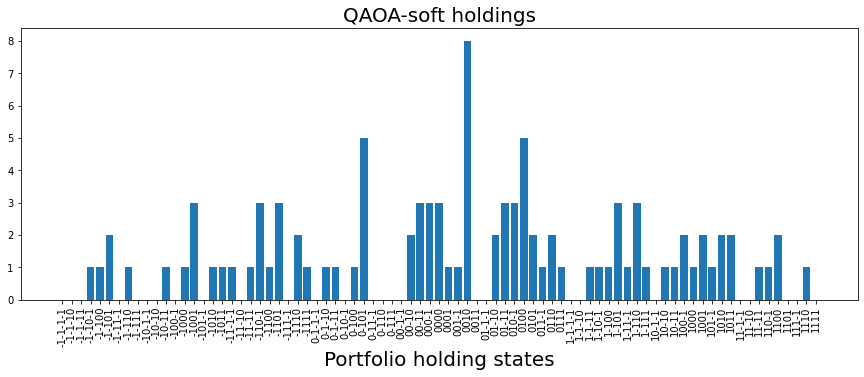

In [39]:
ce_QAOA_soft_results.keys()

print(ce_QAOA_soft_results.keys())
print('optimal_gammas: ', ce_QAOA_soft_results['optimal_gammas'])
print('optimals_beteas: ', ce_QAOA_soft_results['optimal_betas'])
#print('best solutions: 'ce_QAOA_soft_results['best_solutions'])

bitstrings = portfolio.measure_circuit(QAOA_soft_circuit,parameters=benchmark_parameters,
                                       betas=ce_QAOA_soft_results['optimal_betas'],
                                       gammas=ce_QAOA_soft_results['optimal_gammas'],
                                       n_trials=N_trials_ce)
portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)

plt.figure(figsize=(15,5))
plt.title("QAOA-soft holdings",size=20)
plt.bar(np.arange(len(portfolio_holdings['labels'])), portfolio_holdings['counts'], tick_label=portfolio_holdings['labels'])
plt.xticks(rotation=90)
plt.xlabel('Portfolio holding states',size=20)
plt.show()